# First Solution Exercise 1

<div class="alert alert-info">
    <b>Exercise objectives:</b>

a) Display the basins on the map using a color scale based on the average value of the series between 1/1980 and 12/2020 [Classify into 5 color ranges]

b) Briefly describe the challenges you faced in developing the exercise in terms of deployment and the solutions you found to present the exercise in a way that is fluid in the requested functionalities.

</div>

### First solution: creation and development of an online application using GIS tools and ESRI products: ArcGIS Pro, ArcGIS API For python, ArcGIS Online, and ArcGIS Dashboards

# ArcGIS API For Python

## Import of packages and libraries

In [1]:
from arcgis.map.renderers import (ClassBreaksRenderer, ClassBreakInfo, SizeInfoVisualVariable)
from arcgis.map.symbols import SimpleLineSymbolEsriSLS, SimpleFillSymbolEsriSFS
import numpy as np
import pandas as pd
import math
import os
import time

from datetime import datetime as dt
from IPython.display import Image, HTML
from copy import deepcopy

from arcgis.gis import GIS
from arcgis.features import FeatureLayer, FeatureLayerCollection
from arcgis.geometry import SpatialReference

import arcpy
from arcpy.sa import*
from arcpy.ia import*
from arcpy import env
from arcgis.raster.functions import *

# connect to GIS
from arcgis.gis import GIS
from arcgis.geometry import SpatialReference

## Access and Login into ArcGIS Account

In [2]:
# Prompt user to provide username and password
import getpass
username = input('Enter username: ')
password = getpass.getpass("Enter your password: ") 
gis = GIS("https://udistritalfjc.maps.arcgis.com/home", username, password)

Enter username:  camendezv_UDFJC
Enter your password:  ········


## Definition WorkSpace

In [3]:
path = os.chdir(r'C:\Users\USUARIO\Downloads\SEI\Time_series')
path = os.getcwd()
path

'C:\\Users\\USUARIO\\Downloads\\SEI\\Time_series'

## Import the Time Series in (.csv) format

In [4]:
data = pd.pandas.read_csv(r'WEAP_Escorrentia_convertido.csv', parse_dates=True)
print(data.head())

             Branch   1980_01_01   1980_02_01   1980_03_01   1980_04_01  \
0      MC_Amazonica    9908141.0   48506012.0   39480903.0    8497107.0   
1    MC_Amazonica_2  304846288.0  919079586.0  872686746.0  189000241.0   
2    MC_Amazonica_3   87731407.0  275746942.0  233070128.0   23127988.0   
3  MC_Amazonica_3_2     379626.0     435883.0     372386.0      77466.2   
4    MC_del Plata_2   85433274.0    2466356.0   46074512.0     880844.0   

   1980_05_01   1980_06_01    1980_07_01    1980_08_01  1980_09_01  ...  \
0   691351.00   8619.57000   1182.230000   1017.620000    122198.0  ...   
1  9277375.00  62110.40000  16641.600000  47252.700000    540484.0  ...   
2   799298.00  18899.80000  33878.600000  74130.000000    287545.0  ...   
3    21306.10   2869.98000  11985.800000  18051.300000     42887.5  ...   
4     2597.12      1.30297      0.000722      0.000013         0.0  ...   

     2020_03_01    2020_04_01    2020_05_01  2020_06_01  2020_07_01  \
0  1.409411e+06  3.494760e+

## Adding a new column to the CSV table

In [5]:
data['avg_80_20'] = None

### Calculation of averages “avg” between 1980 and 2020 for the 260 river basins

In [6]:
row_averages = data.mean(axis=1, skipna=True, numeric_only=True)
data['avg_80_20'] = row_averages
print(data['avg_80_20'])

0      1.013722e+07
1      2.318555e+08
2      2.920528e+07
3      4.192243e+03
4      9.659120e+06
           ...     
255    1.672150e+04
256    5.087154e+07
257    1.924588e+08
258    1.105286e+06
259    1.759081e+04
Name: avg_80_20, Length: 260, dtype: float64


In [7]:
field_name = "avg_80_20"
if field_name in data.columns:
    print(f"Statistics for '{field_name}':")
    print(data[field_name].describe()) # Provides count, mean, std, min, max, quartiles
else:
    print(f"Field '{field_name}' not found in the DataFrame.")

Statistics for 'avg_80_20':
count    2.600000e+02
mean     6.073037e+07
std      1.807277e+08
min      5.055668e-01
25%      1.266384e+05
50%      3.570129e+06
75%      3.966394e+07
max      2.162925e+09
Name: avg_80_20, dtype: float64


### Export the time series in WorkSpace

In [8]:
arcpy.conversion.ExportTable(
    in_table= data,
    out_table=r"C:\Users\USUARIO\Downloads\SEI\Time_series\WEAP_Escorrentia_completo.csv",
    where_clause="",
    use_field_alias_as_name="NOT_USE_ALIAS",
    field_mapping='Branch "Branch" true true false 8000 Text 0 0,First,#,WEAP_Escorrentia_convertido.csv,Branch,0,7999;1980-01-01_ "1980-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1980-01-01_,-1,-1;1980-02-01_ "1980-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1980-02-01_,-1,-1;1980-03-01_ "1980-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1980-03-01_,-1,-1;1980-04-01_ "1980-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1980-04-01_,-1,-1;1980-05-01_ "1980-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1980-05-01_,-1,-1;1980-06-01_ "1980-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1980-06-01_,-1,-1;1980-07-01_ "1980-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1980-07-01_,-1,-1;1980-08-01_ "1980-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1980-08-01_,-1,-1;1980-09-01_ "1980-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1980-09-01_,-1,-1;1980-10-01_ "1980-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1980-10-01_,-1,-1;1980-11-01_ "1980-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1980-11-01_,-1,-1;1980-12-01_ "1980-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1980-12-01_,-1,-1;1981-01-01_ "1981-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1981-01-01_,-1,-1;1981-02-01_ "1981-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1981-02-01_,-1,-1;1981-03-01_ "1981-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1981-03-01_,-1,-1;1981-04-01_ "1981-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1981-04-01_,-1,-1;1981-05-01_ "1981-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1981-05-01_,-1,-1;1981-06-01_ "1981-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1981-06-01_,-1,-1;1981-07-01_ "1981-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1981-07-01_,-1,-1;1981-08-01_ "1981-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1981-08-01_,-1,-1;1981-09-01_ "1981-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1981-09-01_,-1,-1;1981-10-01_ "1981-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1981-10-01_,-1,-1;1981-11-01_ "1981-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1981-11-01_,-1,-1;1981-12-01_ "1981-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1981-12-01_,-1,-1;1982-01-01_ "1982-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1982-01-01_,-1,-1;1982-02-01_ "1982-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1982-02-01_,-1,-1;1982-03-01_ "1982-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1982-03-01_,-1,-1;1982-04-01_ "1982-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1982-04-01_,-1,-1;1982-05-01_ "1982-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1982-05-01_,-1,-1;1982-06-01_ "1982-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1982-06-01_,-1,-1;1982-07-01_ "1982-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1982-07-01_,-1,-1;1982-08-01_ "1982-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1982-08-01_,-1,-1;1982-09-01_ "1982-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1982-09-01_,-1,-1;1982-10-01_ "1982-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1982-10-01_,-1,-1;1982-11-01_ "1982-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1982-11-01_,-1,-1;1982-12-01_ "1982-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1982-12-01_,-1,-1;1983-01-01_ "1983-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1983-01-01_,-1,-1;1983-02-01_ "1983-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1983-02-01_,-1,-1;1983-03-01_ "1983-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1983-03-01_,-1,-1;1983-04-01_ "1983-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1983-04-01_,-1,-1;1983-05-01_ "1983-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1983-05-01_,-1,-1;1983-06-01_ "1983-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1983-06-01_,-1,-1;1983-07-01_ "1983-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1983-07-01_,-1,-1;1983-08-01_ "1983-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1983-08-01_,-1,-1;1983-09-01_ "1983-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1983-09-01_,-1,-1;1983-10-01_ "1983-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1983-10-01_,-1,-1;1983-11-01_ "1983-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1983-11-01_,-1,-1;1983-12-01_ "1983-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1983-12-01_,-1,-1;1984-01-01_ "1984-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1984-01-01_,-1,-1;1984-02-01_ "1984-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1984-02-01_,-1,-1;1984-03-01_ "1984-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1984-03-01_,-1,-1;1984-04-01_ "1984-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1984-04-01_,-1,-1;1984-05-01_ "1984-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1984-05-01_,-1,-1;1984-06-01_ "1984-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1984-06-01_,-1,-1;1984-07-01_ "1984-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1984-07-01_,-1,-1;1984-08-01_ "1984-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1984-08-01_,-1,-1;1984-09-01_ "1984-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1984-09-01_,-1,-1;1984-10-01_ "1984-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1984-10-01_,-1,-1;1984-11-01_ "1984-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1984-11-01_,-1,-1;1984-12-01_ "1984-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1984-12-01_,-1,-1;1985-01-01_ "1985-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1985-01-01_,-1,-1;1985-02-01_ "1985-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1985-02-01_,-1,-1;1985-03-01_ "1985-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1985-03-01_,-1,-1;1985-04-01_ "1985-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1985-04-01_,-1,-1;1985-05-01_ "1985-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1985-05-01_,-1,-1;1985-06-01_ "1985-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1985-06-01_,-1,-1;1985-07-01_ "1985-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1985-07-01_,-1,-1;1985-08-01_ "1985-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1985-08-01_,-1,-1;1985-09-01_ "1985-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1985-09-01_,-1,-1;1985-10-01_ "1985-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1985-10-01_,-1,-1;1985-11-01_ "1985-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1985-11-01_,-1,-1;1985-12-01_ "1985-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1985-12-01_,-1,-1;1986-01-01_ "1986-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1986-01-01_,-1,-1;1986-02-01_ "1986-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1986-02-01_,-1,-1;1986-03-01_ "1986-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1986-03-01_,-1,-1;1986-04-01_ "1986-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1986-04-01_,-1,-1;1986-05-01_ "1986-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1986-05-01_,-1,-1;1986-06-01_ "1986-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1986-06-01_,-1,-1;1986-07-01_ "1986-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1986-07-01_,-1,-1;1986-08-01_ "1986-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1986-08-01_,-1,-1;1986-09-01_ "1986-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1986-09-01_,-1,-1;1986-10-01_ "1986-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1986-10-01_,-1,-1;1986-11-01_ "1986-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1986-11-01_,-1,-1;1986-12-01_ "1986-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1986-12-01_,-1,-1;1987-01-01_ "1987-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1987-01-01_,-1,-1;1987-02-01_ "1987-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1987-02-01_,-1,-1;1987-03-01_ "1987-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1987-03-01_,-1,-1;1987-04-01_ "1987-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1987-04-01_,-1,-1;1987-05-01_ "1987-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1987-05-01_,-1,-1;1987-06-01_ "1987-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1987-06-01_,-1,-1;1987-07-01_ "1987-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1987-07-01_,-1,-1;1987-08-01_ "1987-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1987-08-01_,-1,-1;1987-09-01_ "1987-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1987-09-01_,-1,-1;1987-10-01_ "1987-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1987-10-01_,-1,-1;1987-11-01_ "1987-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1987-11-01_,-1,-1;1987-12-01_ "1987-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1987-12-01_,-1,-1;1988-01-01_ "1988-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1988-01-01_,-1,-1;1988-02-01_ "1988-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1988-02-01_,-1,-1;1988-03-01_ "1988-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1988-03-01_,-1,-1;1988-04-01_ "1988-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1988-04-01_,-1,-1;1988-05-01_ "1988-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1988-05-01_,-1,-1;1988-06-01_ "1988-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1988-06-01_,-1,-1;1988-07-01_ "1988-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1988-07-01_,-1,-1;1988-08-01_ "1988-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1988-08-01_,-1,-1;1988-09-01_ "1988-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1988-09-01_,-1,-1;1988-10-01_ "1988-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1988-10-01_,-1,-1;1988-11-01_ "1988-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1988-11-01_,-1,-1;1988-12-01_ "1988-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1988-12-01_,-1,-1;1989-01-01_ "1989-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1989-01-01_,-1,-1;1989-02-01_ "1989-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1989-02-01_,-1,-1;1989-03-01_ "1989-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1989-03-01_,-1,-1;1989-04-01_ "1989-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1989-04-01_,-1,-1;1989-05-01_ "1989-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1989-05-01_,-1,-1;1989-06-01_ "1989-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1989-06-01_,-1,-1;1989-07-01_ "1989-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1989-07-01_,-1,-1;1989-08-01_ "1989-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1989-08-01_,-1,-1;1989-09-01_ "1989-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1989-09-01_,-1,-1;1989-10-01_ "1989-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1989-10-01_,-1,-1;1989-11-01_ "1989-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1989-11-01_,-1,-1;1989-12-01_ "1989-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1989-12-01_,-1,-1;1990-01-01_ "1990-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1990-01-01_,-1,-1;1990-02-01_ "1990-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1990-02-01_,-1,-1;1990-03-01_ "1990-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1990-03-01_,-1,-1;1990-04-01_ "1990-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1990-04-01_,-1,-1;1990-05-01_ "1990-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1990-05-01_,-1,-1;1990-06-01_ "1990-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1990-06-01_,-1,-1;1990-07-01_ "1990-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1990-07-01_,-1,-1;1990-08-01_ "1990-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1990-08-01_,-1,-1;1990-09-01_ "1990-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1990-09-01_,-1,-1;1990-10-01_ "1990-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1990-10-01_,-1,-1;1990-11-01_ "1990-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1990-11-01_,-1,-1;1990-12-01_ "1990-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1990-12-01_,-1,-1;1991-01-01_ "1991-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1991-01-01_,-1,-1;1991-02-01_ "1991-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1991-02-01_,-1,-1;1991-03-01_ "1991-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1991-03-01_,-1,-1;1991-04-01_ "1991-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1991-04-01_,-1,-1;1991-05-01_ "1991-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1991-05-01_,-1,-1;1991-06-01_ "1991-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1991-06-01_,-1,-1;1991-07-01_ "1991-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1991-07-01_,-1,-1;1991-08-01_ "1991-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1991-08-01_,-1,-1;1991-09-01_ "1991-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1991-09-01_,-1,-1;1991-10-01_ "1991-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1991-10-01_,-1,-1;1991-11-01_ "1991-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1991-11-01_,-1,-1;1991-12-01_ "1991-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1991-12-01_,-1,-1;1992-01-01_ "1992-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1992-01-01_,-1,-1;1992-02-01_ "1992-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1992-02-01_,-1,-1;1992-03-01_ "1992-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1992-03-01_,-1,-1;1992-04-01_ "1992-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1992-04-01_,-1,-1;1992-05-01_ "1992-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1992-05-01_,-1,-1;1992-06-01_ "1992-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1992-06-01_,-1,-1;1992-07-01_ "1992-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1992-07-01_,-1,-1;1992-08-01_ "1992-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1992-08-01_,-1,-1;1992-09-01_ "1992-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1992-09-01_,-1,-1;1992-10-01_ "1992-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1992-10-01_,-1,-1;1992-11-01_ "1992-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1992-11-01_,-1,-1;1992-12-01_ "1992-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1992-12-01_,-1,-1;1993-01-01_ "1993-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1993-01-01_,-1,-1;1993-02-01_ "1993-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1993-02-01_,-1,-1;1993-03-01_ "1993-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1993-03-01_,-1,-1;1993-04-01_ "1993-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1993-04-01_,-1,-1;1993-05-01_ "1993-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1993-05-01_,-1,-1;1993-06-01_ "1993-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1993-06-01_,-1,-1;1993-07-01_ "1993-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1993-07-01_,-1,-1;1993-08-01_ "1993-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1993-08-01_,-1,-1;1993-09-01_ "1993-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1993-09-01_,-1,-1;1993-10-01_ "1993-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1993-10-01_,-1,-1;1993-11-01_ "1993-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1993-11-01_,-1,-1;1993-12-01_ "1993-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1993-12-01_,-1,-1;1994-01-01_ "1994-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1994-01-01_,-1,-1;1994-02-01_ "1994-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1994-02-01_,-1,-1;1994-03-01_ "1994-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1994-03-01_,-1,-1;1994-04-01_ "1994-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1994-04-01_,-1,-1;1994-05-01_ "1994-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1994-05-01_,-1,-1;1994-06-01_ "1994-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1994-06-01_,-1,-1;1994-07-01_ "1994-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1994-07-01_,-1,-1;1994-08-01_ "1994-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1994-08-01_,-1,-1;1994-09-01_ "1994-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1994-09-01_,-1,-1;1994-10-01_ "1994-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1994-10-01_,-1,-1;1994-11-01_ "1994-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1994-11-01_,-1,-1;1994-12-01_ "1994-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1994-12-01_,-1,-1;1995-01-01_ "1995-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1995-01-01_,-1,-1;1995-02-01_ "1995-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1995-02-01_,-1,-1;1995-03-01_ "1995-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1995-03-01_,-1,-1;1995-04-01_ "1995-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1995-04-01_,-1,-1;1995-05-01_ "1995-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1995-05-01_,-1,-1;1995-06-01_ "1995-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1995-06-01_,-1,-1;1995-07-01_ "1995-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1995-07-01_,-1,-1;1995-08-01_ "1995-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1995-08-01_,-1,-1;1995-09-01_ "1995-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1995-09-01_,-1,-1;1995-10-01_ "1995-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1995-10-01_,-1,-1;1995-11-01_ "1995-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1995-11-01_,-1,-1;1995-12-01_ "1995-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1995-12-01_,-1,-1;1996-01-01_ "1996-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1996-01-01_,-1,-1;1996-02-01_ "1996-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1996-02-01_,-1,-1;1996-03-01_ "1996-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1996-03-01_,-1,-1;1996-04-01_ "1996-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1996-04-01_,-1,-1;1996-05-01_ "1996-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1996-05-01_,-1,-1;1996-06-01_ "1996-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1996-06-01_,-1,-1;1996-07-01_ "1996-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1996-07-01_,-1,-1;1996-08-01_ "1996-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1996-08-01_,-1,-1;1996-09-01_ "1996-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1996-09-01_,-1,-1;1996-10-01_ "1996-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1996-10-01_,-1,-1;1996-11-01_ "1996-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1996-11-01_,-1,-1;1996-12-01_ "1996-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1996-12-01_,-1,-1;1997-01-01_ "1997-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1997-01-01_,-1,-1;1997-02-01_ "1997-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1997-02-01_,-1,-1;1997-03-01_ "1997-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1997-03-01_,-1,-1;1997-04-01_ "1997-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1997-04-01_,-1,-1;1997-05-01_ "1997-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1997-05-01_,-1,-1;1997-06-01_ "1997-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1997-06-01_,-1,-1;1997-07-01_ "1997-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1997-07-01_,-1,-1;1997-08-01_ "1997-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1997-08-01_,-1,-1;1997-09-01_ "1997-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1997-09-01_,-1,-1;1997-10-01_ "1997-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1997-10-01_,-1,-1;1997-11-01_ "1997-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1997-11-01_,-1,-1;1997-12-01_ "1997-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1997-12-01_,-1,-1;1998-01-01_ "1998-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1998-01-01_,-1,-1;1998-02-01_ "1998-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1998-02-01_,-1,-1;1998-03-01_ "1998-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1998-03-01_,-1,-1;1998-04-01_ "1998-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1998-04-01_,-1,-1;1998-05-01_ "1998-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1998-05-01_,-1,-1;1998-06-01_ "1998-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1998-06-01_,-1,-1;1998-07-01_ "1998-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1998-07-01_,-1,-1;1998-08-01_ "1998-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1998-08-01_,-1,-1;1998-09-01_ "1998-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1998-09-01_,-1,-1;1998-10-01_ "1998-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1998-10-01_,-1,-1;1998-11-01_ "1998-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1998-11-01_,-1,-1;1998-12-01_ "1998-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1998-12-01_,-1,-1;1999-01-01_ "1999-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1999-01-01_,-1,-1;1999-02-01_ "1999-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1999-02-01_,-1,-1;1999-03-01_ "1999-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1999-03-01_,-1,-1;1999-04-01_ "1999-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1999-04-01_,-1,-1;1999-05-01_ "1999-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1999-05-01_,-1,-1;1999-06-01_ "1999-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1999-06-01_,-1,-1;1999-07-01_ "1999-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1999-07-01_,-1,-1;1999-08-01_ "1999-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1999-08-01_,-1,-1;1999-09-01_ "1999-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1999-09-01_,-1,-1;1999-10-01_ "1999-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1999-10-01_,-1,-1;1999-11-01_ "1999-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1999-11-01_,-1,-1;1999-12-01_ "1999-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,1999-12-01_,-1,-1;2000-01-01_ "2000-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2000-01-01_,-1,-1;2000-02-01_ "2000-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2000-02-01_,-1,-1;2000-03-01_ "2000-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2000-03-01_,-1,-1;2000-04-01_ "2000-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2000-04-01_,-1,-1;2000-05-01_ "2000-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2000-05-01_,-1,-1;2000-06-01_ "2000-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2000-06-01_,-1,-1;2000-07-01_ "2000-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2000-07-01_,-1,-1;2000-08-01_ "2000-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2000-08-01_,-1,-1;2000-09-01_ "2000-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2000-09-01_,-1,-1;2000-10-01_ "2000-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2000-10-01_,-1,-1;2000-11-01_ "2000-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2000-11-01_,-1,-1;2000-12-01_ "2000-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2000-12-01_,-1,-1;2001-01-01_ "2001-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2001-01-01_,-1,-1;2001-02-01_ "2001-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2001-02-01_,-1,-1;2001-03-01_ "2001-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2001-03-01_,-1,-1;2001-04-01_ "2001-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2001-04-01_,-1,-1;2001-05-01_ "2001-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2001-05-01_,-1,-1;2001-06-01_ "2001-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2001-06-01_,-1,-1;2001-07-01_ "2001-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2001-07-01_,-1,-1;2001-08-01_ "2001-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2001-08-01_,-1,-1;2001-09-01_ "2001-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2001-09-01_,-1,-1;2001-10-01_ "2001-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2001-10-01_,-1,-1;2001-11-01_ "2001-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2001-11-01_,-1,-1;2001-12-01_ "2001-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2001-12-01_,-1,-1;2002-01-01_ "2002-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2002-01-01_,-1,-1;2002-02-01_ "2002-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2002-02-01_,-1,-1;2002-03-01_ "2002-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2002-03-01_,-1,-1;2002-04-01_ "2002-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2002-04-01_,-1,-1;2002-05-01_ "2002-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2002-05-01_,-1,-1;2002-06-01_ "2002-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2002-06-01_,-1,-1;2002-07-01_ "2002-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2002-07-01_,-1,-1;2002-08-01_ "2002-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2002-08-01_,-1,-1;2002-09-01_ "2002-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2002-09-01_,-1,-1;2002-10-01_ "2002-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2002-10-01_,-1,-1;2002-11-01_ "2002-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2002-11-01_,-1,-1;2002-12-01_ "2002-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2002-12-01_,-1,-1;2003-01-01_ "2003-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2003-01-01_,-1,-1;2003-02-01_ "2003-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2003-02-01_,-1,-1;2003-03-01_ "2003-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2003-03-01_,-1,-1;2003-04-01_ "2003-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2003-04-01_,-1,-1;2003-05-01_ "2003-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2003-05-01_,-1,-1;2003-06-01_ "2003-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2003-06-01_,-1,-1;2003-07-01_ "2003-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2003-07-01_,-1,-1;2003-08-01_ "2003-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2003-08-01_,-1,-1;2003-09-01_ "2003-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2003-09-01_,-1,-1;2003-10-01_ "2003-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2003-10-01_,-1,-1;2003-11-01_ "2003-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2003-11-01_,-1,-1;2003-12-01_ "2003-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2003-12-01_,-1,-1;2004-01-01_ "2004-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2004-01-01_,-1,-1;2004-02-01_ "2004-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2004-02-01_,-1,-1;2004-03-01_ "2004-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2004-03-01_,-1,-1;2004-04-01_ "2004-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2004-04-01_,-1,-1;2004-05-01_ "2004-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2004-05-01_,-1,-1;2004-06-01_ "2004-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2004-06-01_,-1,-1;2004-07-01_ "2004-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2004-07-01_,-1,-1;2004-08-01_ "2004-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2004-08-01_,-1,-1;2004-09-01_ "2004-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2004-09-01_,-1,-1;2004-10-01_ "2004-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2004-10-01_,-1,-1;2004-11-01_ "2004-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2004-11-01_,-1,-1;2004-12-01_ "2004-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2004-12-01_,-1,-1;2005-01-01_ "2005-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2005-01-01_,-1,-1;2005-02-01_ "2005-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2005-02-01_,-1,-1;2005-03-01_ "2005-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2005-03-01_,-1,-1;2005-04-01_ "2005-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2005-04-01_,-1,-1;2005-05-01_ "2005-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2005-05-01_,-1,-1;2005-06-01_ "2005-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2005-06-01_,-1,-1;2005-07-01_ "2005-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2005-07-01_,-1,-1;2005-08-01_ "2005-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2005-08-01_,-1,-1;2005-09-01_ "2005-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2005-09-01_,-1,-1;2005-10-01_ "2005-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2005-10-01_,-1,-1;2005-11-01_ "2005-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2005-11-01_,-1,-1;2005-12-01_ "2005-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2005-12-01_,-1,-1;2006-01-01_ "2006-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2006-01-01_,-1,-1;2006-02-01_ "2006-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2006-02-01_,-1,-1;2006-03-01_ "2006-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2006-03-01_,-1,-1;2006-04-01_ "2006-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2006-04-01_,-1,-1;2006-05-01_ "2006-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2006-05-01_,-1,-1;2006-06-01_ "2006-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2006-06-01_,-1,-1;2006-07-01_ "2006-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2006-07-01_,-1,-1;2006-08-01_ "2006-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2006-08-01_,-1,-1;2006-09-01_ "2006-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2006-09-01_,-1,-1;2006-10-01_ "2006-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2006-10-01_,-1,-1;2006-11-01_ "2006-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2006-11-01_,-1,-1;2006-12-01_ "2006-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2006-12-01_,-1,-1;2007-01-01_ "2007-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2007-01-01_,-1,-1;2007-02-01_ "2007-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2007-02-01_,-1,-1;2007-03-01_ "2007-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2007-03-01_,-1,-1;2007-04-01_ "2007-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2007-04-01_,-1,-1;2007-05-01_ "2007-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2007-05-01_,-1,-1;2007-06-01_ "2007-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2007-06-01_,-1,-1;2007-07-01_ "2007-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2007-07-01_,-1,-1;2007-08-01_ "2007-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2007-08-01_,-1,-1;2007-09-01_ "2007-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2007-09-01_,-1,-1;2007-10-01_ "2007-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2007-10-01_,-1,-1;2007-11-01_ "2007-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2007-11-01_,-1,-1;2007-12-01_ "2007-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2007-12-01_,-1,-1;2008-01-01_ "2008-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2008-01-01_,-1,-1;2008-02-01_ "2008-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2008-02-01_,-1,-1;2008-03-01_ "2008-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2008-03-01_,-1,-1;2008-04-01_ "2008-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2008-04-01_,-1,-1;2008-05-01_ "2008-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2008-05-01_,-1,-1;2008-06-01_ "2008-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2008-06-01_,-1,-1;2008-07-01_ "2008-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2008-07-01_,-1,-1;2008-08-01_ "2008-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2008-08-01_,-1,-1;2008-09-01_ "2008-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2008-09-01_,-1,-1;2008-10-01_ "2008-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2008-10-01_,-1,-1;2008-11-01_ "2008-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2008-11-01_,-1,-1;2008-12-01_ "2008-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2008-12-01_,-1,-1;2009-01-01_ "2009-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2009-01-01_,-1,-1;2009-02-01_ "2009-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2009-02-01_,-1,-1;2009-03-01_ "2009-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2009-03-01_,-1,-1;2009-04-01_ "2009-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2009-04-01_,-1,-1;2009-05-01_ "2009-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2009-05-01_,-1,-1;2009-06-01_ "2009-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2009-06-01_,-1,-1;2009-07-01_ "2009-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2009-07-01_,-1,-1;2009-08-01_ "2009-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2009-08-01_,-1,-1;2009-09-01_ "2009-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2009-09-01_,-1,-1;2009-10-01_ "2009-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2009-10-01_,-1,-1;2009-11-01_ "2009-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2009-11-01_,-1,-1;2009-12-01_ "2009-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2009-12-01_,-1,-1;2010-01-01_ "2010-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2010-01-01_,-1,-1;2010-02-01_ "2010-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2010-02-01_,-1,-1;2010-03-01_ "2010-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2010-03-01_,-1,-1;2010-04-01_ "2010-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2010-04-01_,-1,-1;2010-05-01_ "2010-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2010-05-01_,-1,-1;2010-06-01_ "2010-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2010-06-01_,-1,-1;2010-07-01_ "2010-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2010-07-01_,-1,-1;2010-08-01_ "2010-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2010-08-01_,-1,-1;2010-09-01_ "2010-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2010-09-01_,-1,-1;2010-10-01_ "2010-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2010-10-01_,-1,-1;2010-11-01_ "2010-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2010-11-01_,-1,-1;2010-12-01_ "2010-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2010-12-01_,-1,-1;2011-01-01_ "2011-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2011-01-01_,-1,-1;2011-02-01_ "2011-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2011-02-01_,-1,-1;2011-03-01_ "2011-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2011-03-01_,-1,-1;2011-04-01_ "2011-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2011-04-01_,-1,-1;2011-05-01_ "2011-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2011-05-01_,-1,-1;2011-06-01_ "2011-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2011-06-01_,-1,-1;2011-07-01_ "2011-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2011-07-01_,-1,-1;2011-08-01_ "2011-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2011-08-01_,-1,-1;2011-09-01_ "2011-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2011-09-01_,-1,-1;2011-10-01_ "2011-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2011-10-01_,-1,-1;2011-11-01_ "2011-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2011-11-01_,-1,-1;2011-12-01_ "2011-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2011-12-01_,-1,-1;2012-01-01_ "2012-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2012-01-01_,-1,-1;2012-02-01_ "2012-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2012-02-01_,-1,-1;2012-03-01_ "2012-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2012-03-01_,-1,-1;2012-04-01_ "2012-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2012-04-01_,-1,-1;2012-05-01_ "2012-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2012-05-01_,-1,-1;2012-06-01_ "2012-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2012-06-01_,-1,-1;2012-07-01_ "2012-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2012-07-01_,-1,-1;2012-08-01_ "2012-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2012-08-01_,-1,-1;2012-09-01_ "2012-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2012-09-01_,-1,-1;2012-10-01_ "2012-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2012-10-01_,-1,-1;2012-11-01_ "2012-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2012-11-01_,-1,-1;2012-12-01_ "2012-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2012-12-01_,-1,-1;2013-01-01_ "2013-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2013-01-01_,-1,-1;2013-02-01_ "2013-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2013-02-01_,-1,-1;2013-03-01_ "2013-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2013-03-01_,-1,-1;2013-04-01_ "2013-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2013-04-01_,-1,-1;2013-05-01_ "2013-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2013-05-01_,-1,-1;2013-06-01_ "2013-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2013-06-01_,-1,-1;2013-07-01_ "2013-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2013-07-01_,-1,-1;2013-08-01_ "2013-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2013-08-01_,-1,-1;2013-09-01_ "2013-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2013-09-01_,-1,-1;2013-10-01_ "2013-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2013-10-01_,-1,-1;2013-11-01_ "2013-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2013-11-01_,-1,-1;2013-12-01_ "2013-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2013-12-01_,-1,-1;2014-01-01_ "2014-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2014-01-01_,-1,-1;2014-02-01_ "2014-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2014-02-01_,-1,-1;2014-03-01_ "2014-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2014-03-01_,-1,-1;2014-04-01_ "2014-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2014-04-01_,-1,-1;2014-05-01_ "2014-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2014-05-01_,-1,-1;2014-06-01_ "2014-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2014-06-01_,-1,-1;2014-07-01_ "2014-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2014-07-01_,-1,-1;2014-08-01_ "2014-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2014-08-01_,-1,-1;2014-09-01_ "2014-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2014-09-01_,-1,-1;2014-10-01_ "2014-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2014-10-01_,-1,-1;2014-11-01_ "2014-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2014-11-01_,-1,-1;2014-12-01_ "2014-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2014-12-01_,-1,-1;2015-01-01_ "2015-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2015-01-01_,-1,-1;2015-02-01_ "2015-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2015-02-01_,-1,-1;2015-03-01_ "2015-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2015-03-01_,-1,-1;2015-04-01_ "2015-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2015-04-01_,-1,-1;2015-05-01_ "2015-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2015-05-01_,-1,-1;2015-06-01_ "2015-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2015-06-01_,-1,-1;2015-07-01_ "2015-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2015-07-01_,-1,-1;2015-08-01_ "2015-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2015-08-01_,-1,-1;2015-09-01_ "2015-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2015-09-01_,-1,-1;2015-10-01_ "2015-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2015-10-01_,-1,-1;2015-11-01_ "2015-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2015-11-01_,-1,-1;2015-12-01_ "2015-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2015-12-01_,-1,-1;2016-01-01_ "2016-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2016-01-01_,-1,-1;2016-02-01_ "2016-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2016-02-01_,-1,-1;2016-03-01_ "2016-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2016-03-01_,-1,-1;2016-04-01_ "2016-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2016-04-01_,-1,-1;2016-05-01_ "2016-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2016-05-01_,-1,-1;2016-06-01_ "2016-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2016-06-01_,-1,-1;2016-07-01_ "2016-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2016-07-01_,-1,-1;2016-08-01_ "2016-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2016-08-01_,-1,-1;2016-09-01_ "2016-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2016-09-01_,-1,-1;2016-10-01_ "2016-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2016-10-01_,-1,-1;2016-11-01_ "2016-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2016-11-01_,-1,-1;2016-12-01_ "2016-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2016-12-01_,-1,-1;2017-01-01_ "2017-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2017-01-01_,-1,-1;2017-02-01_ "2017-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2017-02-01_,-1,-1;2017-03-01_ "2017-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2017-03-01_,-1,-1;2017-04-01_ "2017-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2017-04-01_,-1,-1;2017-05-01_ "2017-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2017-05-01_,-1,-1;2017-06-01_ "2017-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2017-06-01_,-1,-1;2017-07-01_ "2017-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2017-07-01_,-1,-1;2017-08-01_ "2017-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2017-08-01_,-1,-1;2017-09-01_ "2017-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2017-09-01_,-1,-1;2017-10-01_ "2017-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2017-10-01_,-1,-1;2017-11-01_ "2017-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2017-11-01_,-1,-1;2017-12-01_ "2017-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2017-12-01_,-1,-1;2018-01-01_ "2018-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2018-01-01_,-1,-1;2018-02-01_ "2018-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2018-02-01_,-1,-1;2018-03-01_ "2018-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2018-03-01_,-1,-1;2018-04-01_ "2018-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2018-04-01_,-1,-1;2018-05-01_ "2018-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2018-05-01_,-1,-1;2018-06-01_ "2018-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2018-06-01_,-1,-1;2018-07-01_ "2018-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2018-07-01_,-1,-1;2018-08-01_ "2018-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2018-08-01_,-1,-1;2018-09-01_ "2018-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2018-09-01_,-1,-1;2018-10-01_ "2018-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2018-10-01_,-1,-1;2018-11-01_ "2018-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2018-11-01_,-1,-1;2018-12-01_ "2018-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2018-12-01_,-1,-1;2019-01-01_ "2019-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2019-01-01_,-1,-1;2019-02-01_ "2019-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2019-02-01_,-1,-1;2019-03-01_ "2019-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2019-03-01_,-1,-1;2019-04-01_ "2019-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2019-04-01_,-1,-1;2019-05-01_ "2019-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2019-05-01_,-1,-1;2019-06-01_ "2019-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2019-06-01_,-1,-1;2019-07-01_ "2019-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2019-07-01_,-1,-1;2019-08-01_ "2019-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2019-08-01_,-1,-1;2019-09-01_ "2019-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2019-09-01_,-1,-1;2019-10-01_ "2019-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2019-10-01_,-1,-1;2019-11-01_ "2019-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2019-11-01_,-1,-1;2019-12-01_ "2019-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2019-12-01_,-1,-1;2020-01-01_ "2020-01-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2020-01-01_,-1,-1;2020-02-01_ "2020-02-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2020-02-01_,-1,-1;2020-03-01_ "2020-03-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2020-03-01_,-1,-1;2020-04-01_ "2020-04-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2020-04-01_,-1,-1;2020-05-01_ "2020-05-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2020-05-01_,-1,-1;2020-06-01_ "2020-06-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2020-06-01_,-1,-1;2020-07-01_ "2020-07-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2020-07-01_,-1,-1;2020-08-01_ "2020-08-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2020-08-01_,-1,-1;2020-09-01_ "2020-09-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2020-09-01_,-1,-1;2020-10-01_ "2020-10-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2020-10-01_,-1,-1;2020-11-01_ "2020-11-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2020-11-01_,-1,-1;2020-12-01_ "2020-12-01_" true true false 8 Double 0 0,First,#,WEAP_Escorrentia_convertido.csv,2020-12-01_,-1,-1',
    sort_field=None
)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\pandas\core\dtypes\cast.py:1056: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\pandas\core\dtypes\cast.py:1080: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


'C:\\Users\\USUARIO\\Downloads\\SEI\\Time_series\\WEAP_Escorrentia_completo.csv'

## Joining .shp and .csv files

In [9]:
arcpy.management.JoinField(
    in_data=r"C:\Users\USUARIO\Downloads\SEI\Weap_data\WEAP_Catchment.shp",
    in_field="Name",
    join_table="WEAP_Escorrentia_completo.csv",
    join_field="Branch",
    fields=None,
    fm_option="NOT_USE_FM",
    field_mapping=None,
    index_join_fields="NO_INDEXES"
)

<Result 'C:\\Users\\USUARIO\\Downloads\\SEI\\Weap_data\\WEAP_Catchment.shp'>

### Before importing the .shp file, a column is added to calculate the total area in km2 for the 260 basins.

### Verification of the Union or “Join” operation

In [10]:
weap = r"C:\Users\USUARIO\Downloads\SEI\Weap_data\WEAP_Catchment.shp"
weap_catchment = pd.DataFrame.spatial.from_featureclass(os.path.join(path, weap), sr=SpatialReference(4326).as_arcpy)

In [11]:
weap_catchment.head(-10)

FID  ObjID                Name              Branch    F1980_01_0  \
0      0     53              UH_2_6              UH_2_6   330752700.0   
1      1     57              UH_2_5              UH_2_5   968854832.0   
2      2     61              UH_2_4              UH_2_4   781887888.0   
3      3     45              UH_2_2              UH_2_2   114483057.0   
4      4     81             UH_2_11             UH_2_11   172464988.0   
..   ...    ...                 ...                 ...           ...   
245  245    513             UH_2_47             UH_2_47  1451437493.0   
246  246   3012           UH_2_60_2           UH_2_60_2  1304923709.0   
247  247   3016           UH_2_46_2           UH_2_46_2  1830233657.0   
248  248   3020  UH_2_Q_Porto Velho  UH_2_Q_Porto Velho   724627798.0   
249  249   3029           UH_2_33_2           UH_2_33_2    97998476.0   

       F1980_02_0    F1980_03_0    F1980_04_0   F1980_05_0  F1980_06_0  ...  \
0     699957284.0   644017571.0   154571207.0   17831977.0    600325.0  ...   
1    1483257275.0  1427413960.0   310006100.0   29662068.0    452660.0  ...   
2    1529929220.0  1555420813.0   297579729.0   19588808.0    170753.0  ...   
3     320855975.0   270068309.0    16426213.0     212852.0      2072.8  ...   
4    1002103541.0   661868356.0    81592312.0    4327008.0    262537.0  ...   
..            ...           ...           ...          ...         ...  ...   
245  1683504891.0  1206929717.0   903983667.0  419495505.0  22592901.0  ...   
246  2126897158.0   846956330.0  1143513124.0  385750416.0  17517666.0  ...   
247  1318950794.0   970824526.0   434566239.0  117109792.0  12556864.0  ...   
248  3629395980.0  3290146085.0   601668140.0   27007421.0    256653.0  ...   
249   351283392.0   265564315.0    25120393.0     910353.0     19920.2  ...   

      F2020_06_0  F2020_07_0  F2020_08_0  F2020_09_0  F2020_10_0  F2020_11_0  \
0         3006.6     235.636     14.1813    0.473526     2960.03     1542.28   
1        2001.65     83.9881     4.08898     41.8676     1303.93     238.453   
2        502.891     0.01488    0.000015    0.000116      9.3606     1.58326   
3         0.0001         0.0         0.0         0.0    0.000617    0.000124   
4        6.26367     114.468     5.08491    0.213873     1260.11     144.996   
..           ...         ...         ...         ...         ...         ...   
245  340075409.0  11245889.0     35207.6     1570.51     10.5707     690.594   
246    8894617.0     1588.46    0.090873    0.001497    0.001633     3.78587   
247  155092634.0   3573556.0    354046.0     24082.7    0.176418      7.5472   
248     186075.0    146346.0     62314.6     96851.0    189473.0    290376.0   
249     0.039593    0.000228    0.000011    0.000025    0.024244    0.020005   

       F2020_12_0      avg_80_20    area_total  \
0      97618053.0  207440034.738   4606.790039   
1     115428993.0  422400967.332   8425.179688   
2      42571252.0   433356869.52   8388.660156   
3         149.928  3318965.10962       10564.5   
4       2849411.0  183321172.168  12543.900391   
..            ...            ...           ...   
245  1111958463.0  597696626.602   6963.399902   
246   130461350.0  485700266.475  11384.799805   
247   793848624.0   426742084.93   6296.720215   
248    30698898.0  870168965.125  23237.099609   
249       13143.2  15884306.0116  23869.599609   

                                                 SHAPE  
0    {"rings": [[[-67.7075, -10.704166666666667], [...  
1    {"rings": [[[-66.38333333333334, -9.8666666666...  
2    {"rings": [[[-65.65, -9.814166666666667], [-65...  
3    {"rings": [[[-65.44583333333334, -9.6491666666...  
4    {"rings": [[[-67.32416666666667, -11.510833333...  
..                                                 ...  
245  {"rings": [[[-65.04833333333333, -14.763333333...  
246  {"rings": [[[-64.97416666666666, -14.891666666...  
247  {"rings": [[[-65.85, -14.968333333333334], [-6...  
248  {"rings": [[[-63.91916666666667, -8.758333

## Publishing and uploading the file to the ArcGIS Online portal

<div class="alert alert-info">
    <b>Inconsistencies with automatic publication in ArcGIS Online:</b> 

Due to some errors related to the sharing_draft commands, we have opted to manually publish the shapefile containing information on the 260 watersheds 
and time series

Below is a screenshot of the information provided.
</div>

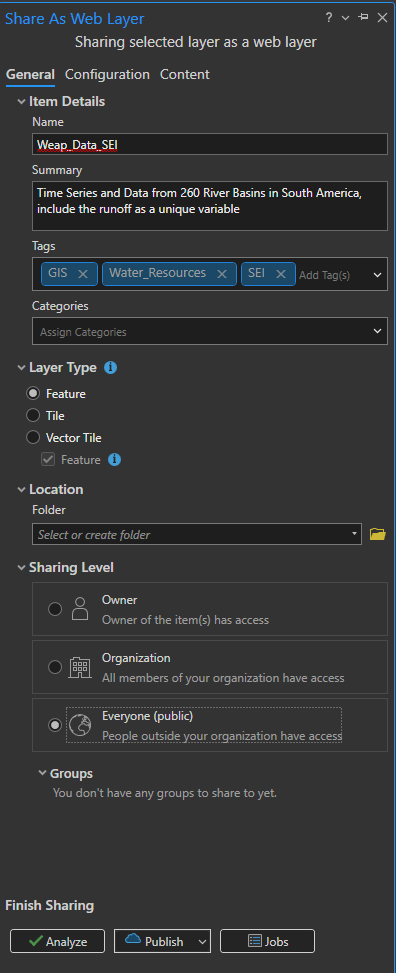

### Script for publishing to ArcGIS Online

In [12]:
aprx = arcpy.mp.ArcGISProject("C:/Users/USUARIO/Downloads/SEI/Research_Associate_Water/Research_Associate_Water.aprx")
m = aprx.listMaps("MapWeap")[0] # Replace "Map Name" with your map's name
# Example for a FeatureSharingDraft from a map

server_type = "HOSTING_SERVER"
service_name = "Weap_Data_SEI"

sharing_draft = m.getWebLayerSharingDraft(server_type, "FEATURE", service_name) 
sharing_draft.summary = "Time Series and Data from 260 River Basins in South America, include the runoff as a unique variable "
sharing_draft.tags = "GIS, Water_Resources, SEI"
#sharing_draft.access_type = "organization"

service_definition_draft = r"C:Temp/MyServiceDefinitionDraft.sddraft"
service_definition = r"C:/Temp/MyServiceDefinition.sd"

sharing_draft.exportToSDDraft(service_definition_draft)
arcpy.StageService_server(service_definition_draft, service_definition)

arcpy.UploadServiceDefinition_server(service_definition, gis.url)

<class 'ValueError'>: Staging path is invalid or inaccessible: C:\Users\USUARIO\Downloads\SEI\Research_Associate_Water\Temp\

## Displaying the base map and cartography

### Creation of the base map

In [25]:
Bolivia_map1 = gis.map("Bolivia")
Bolivia_map1.zoom = 5
Bolivia_map1.basemap.basemap = 'hybrid'
Bolivia_map1

Map(center=[-1882544.102516555, -7190960.141718488], extent={'xmin': -7898952.103163708, 'ymin': -2635750.5346…

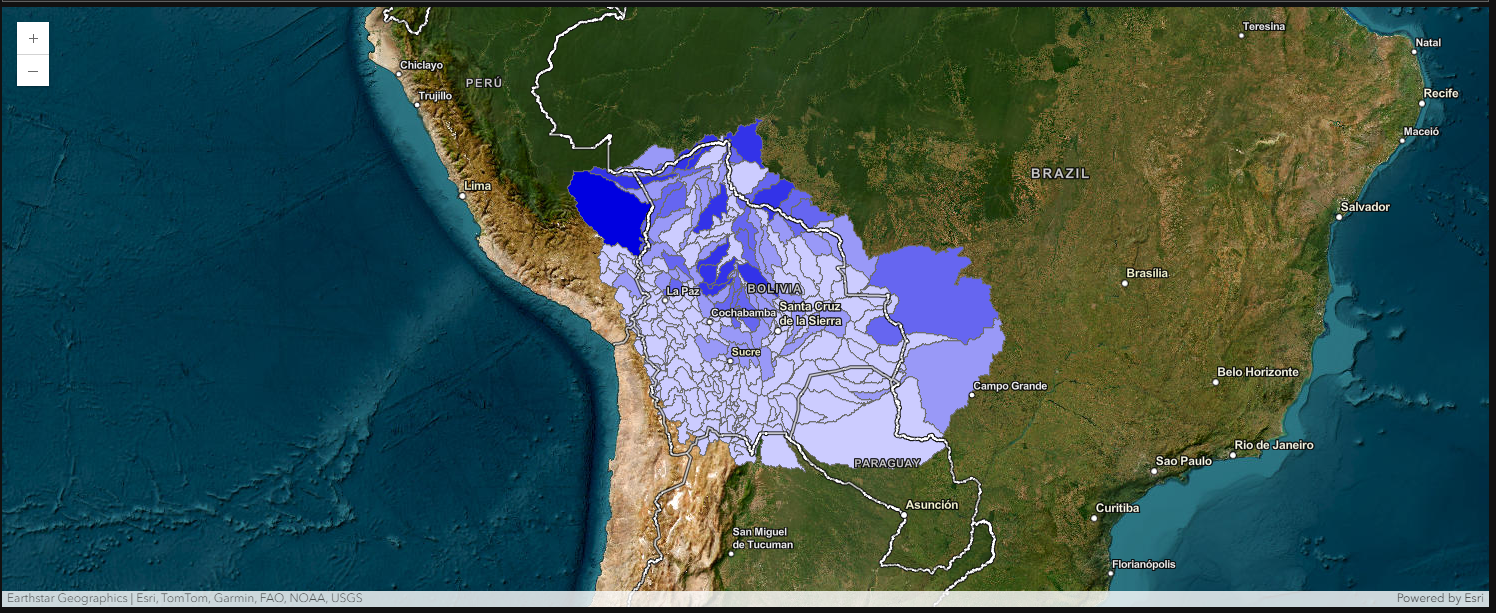

### Adding data hosted on ArcGIS Online

In [21]:
search_title = "Weap_Data_SEI"
search_owner = "camendezv_UDFJC"
query_string = f"title:\"{search_title}\" AND owner:\"{search_owner}\""

<Item title:"Weap_Data_SEI" type:Feature Layer Collection owner:camendezv_UDFJC>
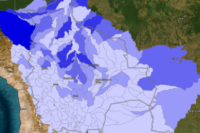

In [26]:
Bol_data = gis.content.search(query=query_string, item_type="Feature Layer")
Bol_data[0]

In [27]:
Bol_data_item = gis.content.get('a7b5b4dac30d4497ba90de267989e004')
Bol_data_layer = Bol_data_item.layers[0]
Bol_data_layer

<FeatureLayer url:"https://services.arcgis.com/deQSb0Gn7gDPf3uV/arcgis/rest/services/Weap_Data_SEI/FeatureServer/1">

In [28]:
Bolivia_map1.content.add(Bol_data_layer)

In [11]:
Bolivia_map2 = gis.map("Bolivia")
Bolivia_map2.zoom = 5
Bolivia_map2.basemap.basemap = 'hybrid'
Bolivia_map2

Map(center=[-1882544.102516555, -7190960.141718488], extent={'xmin': -7898952.103163708, 'ymin': -2635750.5346…

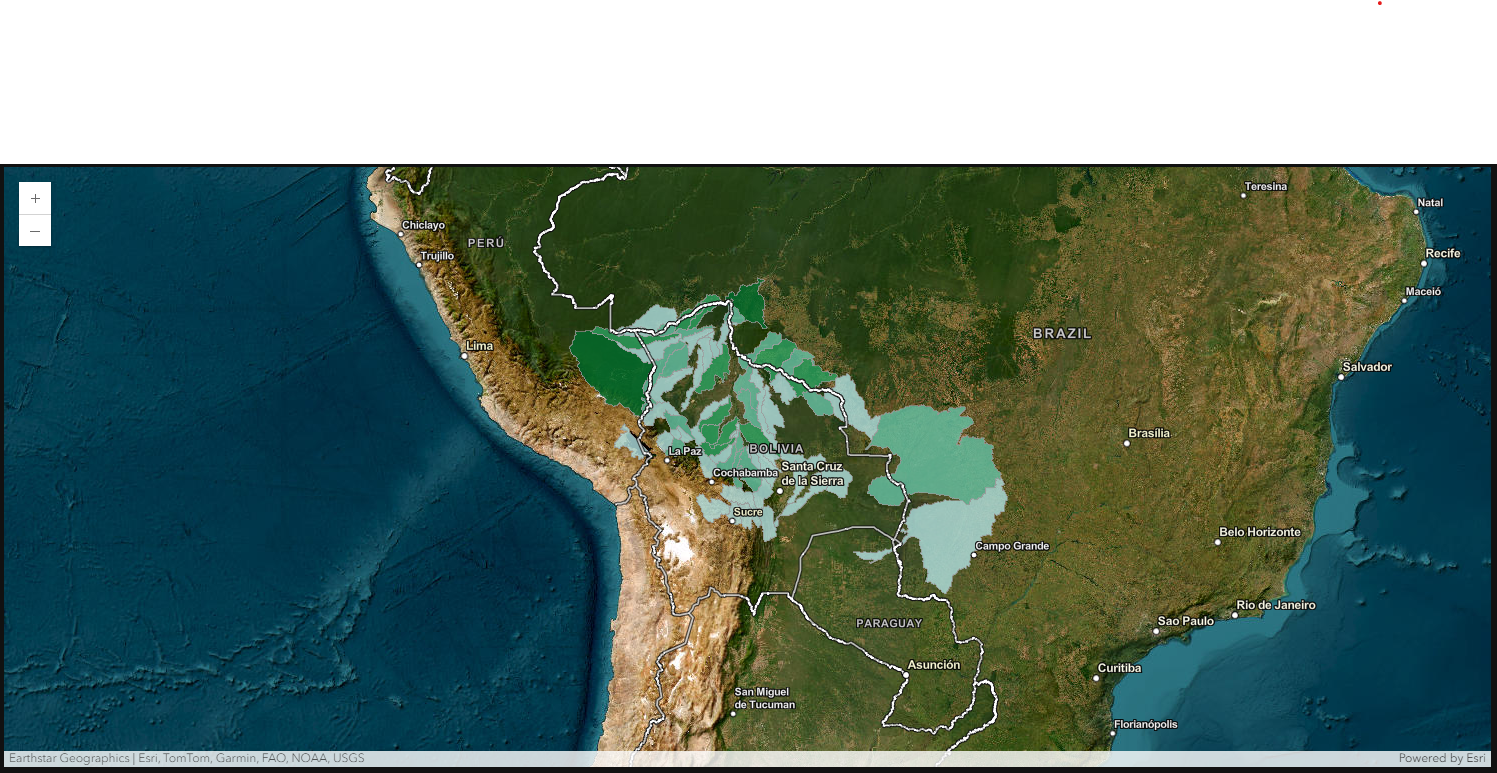

## Creation and updating of symbols

In [12]:
renderer_manager = Bolivia_map1.content.renderer(0)
smart_mapping_manager = renderer_manager.smart_mapping()
smart_mapping_manager.class_breaks_renderer(break_type="color", field="avg_80_20")

In [13]:
from arcgis.map.renderers import (ClassBreaksRenderer,ClassBreakInfo,SizeInfoVisualVariable)
from arcgis.map.symbols import SimpleLineSymbolEsriSLS, SimpleFillSymbolEsriSFS

### Establishment of the 5 classes by color and rank

In [14]:
# Define the class breaks with proper data classes
class_break_infos = [
    ClassBreakInfo(
        class_max_value=31628583.28,
        label="< 10%",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [237, 248, 251, 204],  # Light greenish color
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=135374970.74,
        label="10% - 39.5%",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [178, 226, 226, 204],  # Slightly darker green
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=368868773.39,
        label="39.5% - 54%",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [102, 194, 164, 204],  # Medium green
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=870168965.12,
        label="54% - 68%",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [44, 162, 95, 204],  # Dark green
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=2162925096.79,
        label="> 68%",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [0, 109, 44, 204],  # Darkest green
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
]

# Create the ClassBreaksRenderer using the new dataclass structure
class_breaks_renderer = ClassBreaksRenderer(
    field="avg_80_20",
    class_break_infos=class_break_infos,
    normalization_type=None,  # Change to 'esriNormalizeByField' if you want normalization
)

In [15]:
# Add the layer to the map and visualize
Bolivia_map2.content.add(Bol_data_layer, drawing_info={"renderer": class_breaks_renderer.dict()})
Bolivia_map2

Map(center=[-64.59749402799997, -16.777136868398472], extent={'spatialReference': {'latestWkid': 3857, 'wkid':…